# Periodic table - Prices of chemical elements - $/kg 

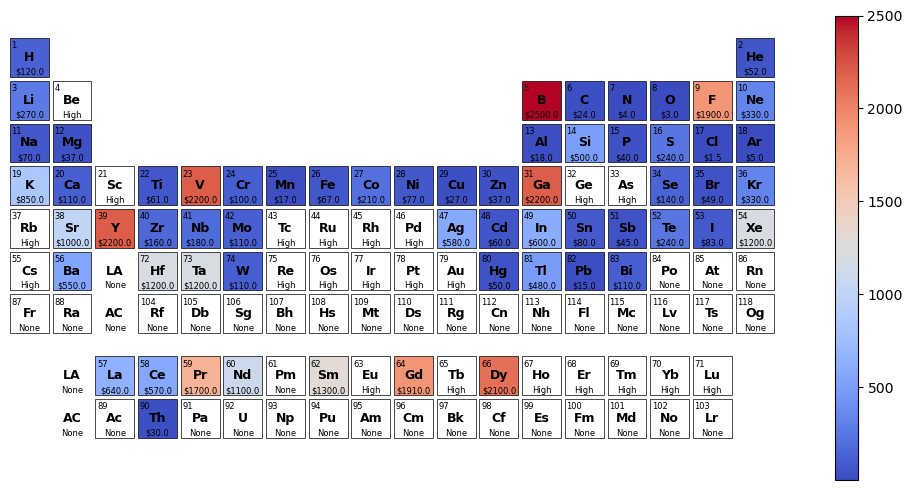

In [1]:
########periodic_table
##########Periodic table - Prices of chemical elements - $/kg 

import matplotlib as mpl  # Import Matplotlib library
import matplotlib.cm as cm  # Import Matplotlib color configuration module
import matplotlib.patches as patches  # Import Matplotlib shape drawing module
import matplotlib.pyplot as plt  # Import Matplotlib plotting module
import mendeleev  # Import Mendeleev library (contains basic properties of 118 elements)

# Heatmap data with prices of elements in $/kg (https://material-properties.org/prices-of-chemical-elements-kg/)
plot_data = {
    'H': 120, 'He': 52, 'Li': 270, 'Be': 5300, 'B': 2500, 'C': 24, 'N': 4, 'O': 3, 
    'F': 1900, 'Ne': 330, 'Na': 70, 'Mg': 37, 'Al': 18, 'Si': 500, 'P': 40, 'S': 240, 
    'Cl': 1.5, 'Ar': 5, 'K': 850, 'Ca': 110, 'Sc': 14000, 'Ti': 61, 'V': 2200, 'Cr': 100, 
    'Mn': 17, 'Fe': 67, 'Co': 210, 'Ni': 77, 'Cu': 27, 'Zn': 37, 'Ga': 2200, 'Ge': 3600, 
    'As': 3200, 'Se': 140, 'Br': 49, 'Kr': 330, 'Rb': 12000, 'Sr': 1000, 'Y': 2200, 
    'Zr': 160, 'Nb': 180, 'Mo': 110, 'Tc': 100000, 'Ru': 8000, 'Rh': 180000, 'Pd': 48000, 
    'Ag': 580, 'Cd': 60, 'In': 600, 'Sn': 80, 'Sb': 45, 'Te': 240, 'I': 83, 'Xe': 1200, 
    'Cs': 11000, 'Ba': 550, 'La': 640, 'Ce': 570, 'Pr': 1700, 'Nd': 1100, 'Pm': None, 
    'Sm': 1300, 'Eu': 36000, 'Gd': 1910, 'Tb': 18000, 'Dy': 2100, 'Ho': 7400, 
    'Er': 2700, 'Tm': 70000, 'Yb': 5300, 'Lu': 69000, 'Hf': 1200, 'Ta': 1200, 'W': 110, 
    'Re': 5400, 'Os': 20000, 'Ir': 44900, 'Pt': 31500, 'Au': 49900, 'Hg': 50, 'Tl': 480, 
    'Pb': 15, 'Bi': 110, 'Po': None, 'At': None, 'Rn': None, 'Fr': None, 'Ra': None, 
    'Ac': None, 'Th': 30, 'Pa': None, 'U': None, 'Np': None, 'Pu': None, 'Am': None, 
    'Cm': None, 'Bk': None, 'Cf': None, 'Es': None, 'Fm': None, 'Md': None, 
    'No': None, 'Lr': None, 'Rf': None, 'Db': None, 'Sg': None, 'Bh': None, 
    'Hs': None, 'Mt': None, 'Ds': None, 'Rg': None, 'Cn': None, 'Nh': None, 
    'Fl': None, 'Mc': None, 'Lv': None, 'Ts': None, 'Og': None
}

# Settings for cells in the periodic table
cell_length = 1
cell_gap = 0.1
cell_edge_width = 0.5
####################Define the threshold for high prices
price_threshold = 2500  
####################
# Get atomic number, period (row), group (column), and plot data for each element (set to 0 if not present)
elements = []
for i in range(1, 119):
    ele = mendeleev.element(i)
    ele_group, ele_period = ele.group_id, ele.period

    if 57 <= i <= 71:
        ele_group = i - 57 + 3
        ele_period = 8
    if 89 <= i <= 103:
        ele_group = i - 89 + 3
        ele_period = 9

    elements.append([i, ele.symbol, ele_group, ele_period, plot_data.get(ele.symbol, None)])

# Set annotation labels for Lanthanides and Actinides
elements.append([None, 'LA', 3, 6, None])
elements.append([None, 'AC', 3, 7, None])
elements.append([None, 'LA', 2, 8, None])
elements.append([None, 'AC', 2, 9, None])

# Create a new Matplotlib plot window
fig, ax = plt.subplots(figsize=(10, 5))
xy_length = (20, 11)

# Get viridis color map
my_cmap = plt.get_cmap('coolwarm')  #https://matplotlib.org/stable/users/explain/colors/colormaps.html
# my_cmap = plt.get_cmap('YlOrRd')
valid_prices = [price for price in plot_data.values() if price is not None and price <= price_threshold]
norm = mpl.colors.Normalize(vmin=min(valid_prices), vmax=max(valid_prices))
my_cmap.set_under('None')
cmmapable = cm.ScalarMappable(norm, my_cmap)
plt.colorbar(cmmapable, ax=ax, drawedges=False)

# Draw the periodic table
for e in elements:
    ele_number, ele_symbol, ele_group, ele_period, ele_price = e
    if ele_group is None:
        continue

    x = (cell_length + cell_gap) * (ele_group - 1)
    y = xy_length[1] - ((cell_length + cell_gap) * ele_period)

    if ele_period >= 8:
        y -= cell_length * 0.5

    if ele_number:
        if ele_price is None:
            fill_color = 'white'
            price_label = 'None'
        elif ele_price > price_threshold:
            fill_color = 'white'
            price_label = 'High'
        else:
            fill_color = my_cmap(norm(ele_price))
            price_label = f"${ele_price:.1f}"
        
        rect = patches.Rectangle(xy=(x, y),
                                width=cell_length, height=cell_length,
                                linewidth=cell_edge_width,
                                edgecolor='k',
                                facecolor=fill_color)
        ax.add_patch(rect)

    ax.text(x + 0.04, y + 0.8, ele_number, va='center', ha='left', fontdict={'size': 6, 'color': 'black'})
    ax.text(x + 0.5, y + 0.5, ele_symbol, va='center', ha='center', fontdict={'size': 9, 'weight': 'bold'})
    
    # Add price text only if ele_price is not None
    # if ele_price is not None:
    ax.text(x + 0.5, y + 0.12, price_label, va='center', ha='center', fontdict={'size': 6, 'color': 'black'})

ax.axis('equal')
ax.axis('off')
plt.tight_layout()
ax.set_ylim(0, xy_length[1])
ax.set_xlim(0, xy_length[0])

plt.savefig('./periodic_table_prices.pdf', bbox_inches='tight')
plt.show()

# Periodic table - molar mass of chemical elements - g/mol

Atomic Number | Symbol | Group | Period | Molar mass
1 H 1 1 1.008
2 He 18 1 4.003
3 Li 1 2 6.941
4 Be 2 2 9.012
5 B 13 2 10.811
6 C 14 2 12.011
7 N 15 2 14.007
8 O 16 2 15.999
9 F 17 2 18.998
10 Ne 18 2 20.18
11 Na 1 3 22.99
12 Mg 2 3 24.305
13 Al 13 3 26.981
14 Si 14 3 28.086
15 P 15 3 30.974
16 S 16 3 32.066
17 Cl 17 3 35.453
18 Ar 18 3 39.948
19 K 1 4 39.098
20 Ca 2 4 40.078
21 Sc 3 4 44.956
22 Ti 4 4 47.88
23 V 5 4 50.942
24 Cr 6 4 51.996
25 Mn 7 4 54.938
26 Fe 8 4 55.845
27 Co 9 4 58.933
28 Ni 10 4 58.693
29 Cu 11 4 63.546
30 Zn 12 4 65.38
31 Ga 13 4 69.723
32 Ge 14 4 72.631
33 As 15 4 74.922
34 Se 16 4 78.971
35 Br 17 4 79.904
36 Kr 18 4 83.798
37 Rb 1 5 85.468
38 Sr 2 5 87.62
39 Y 3 5 88.909
40 Zr 4 5 91.224
41 Nb 5 5 92.906
42 Mo 6 5 95.96
43 Tc 7 5 98.907
44 Ru 8 5 101.07
45 Rh 9 5 102.906
46 Pd 10 5 106.42
47 Ag 11 5 107.868
48 Cd 12 5 112.414
49 In 13 5 114.818
50 Sn 14 5 118.711
51 Sb 15 5 121.76
52 Te 16 5 127.6
53 I 17 5 126.904
54 Xe 18 5 131.249
55 Cs 1 6 132.905
56 Ba

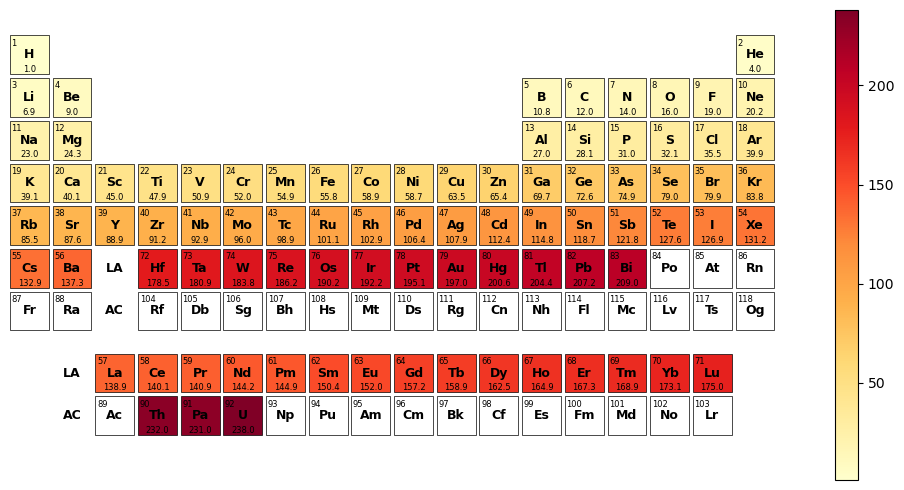

In [2]:
########periodic_table
##########Periodic table - molar mass of chemical elements - g/mol

import matplotlib as mpl  # Import Matplotlib library
import matplotlib.cm as cm  # Import Matplotlib color configuration module
import matplotlib.patches as patches  # Import Matplotlib shape drawing module
import matplotlib.pyplot as plt  # Import Matplotlib plotting module
import mendeleev  # Import Mendeleev library (contains basic properties of 118 elements)

# Heatmap data - molar mass; element count or other data can be used
plot_data = {
    "H": 1.008, "He": 4.003, "Li": 6.941, "Be": 9.012, "B": 10.811, "C": 12.011,
    "N": 14.007, "O": 15.999, "F": 18.998, "Ne": 20.180, "Na": 22.990, "Mg": 24.305,
    "Al": 26.981, "Si": 28.086, "P": 30.974, "S": 32.066, "Cl": 35.453,"Ar": 39.948,"K": 39.098,
    "Ca": 40.078, "Sc": 44.956, "Ti": 47.88, "V": 50.942, "Cr": 51.996,
    "Mn": 54.938, "Fe": 55.845, "Co": 58.933, "Ni": 58.693, "Cu": 63.546, "Zn": 65.38,
    "Ga": 69.723, "Ge": 72.631, "As": 74.922, "Se": 78.971, "Br": 79.904, "Kr": 83.798,
    "Rb": 85.468, "Sr": 87.62, "Y": 88.909, "Zr": 91.224, "Nb": 92.906, "Mo": 95.96,
    "Tc": 98.907, "Ru": 101.07, "Rh": 102.906, "Pd": 106.42, "Ag": 107.868, "Cd": 112.414,
    "In": 114.818, "Sn": 118.711, "Sb": 121.760, "Te": 127.60, "I": 126.904, "Xe": 131.249,
    "Cs": 132.905, "Ba": 137.328, "La": 138.905, "Ce": 140.116, "Pr": 140.907, "Nd": 144.243,
    "Pm": 144.913, "Sm": 150.36, "Eu": 151.964, "Gd": 157.25, "Tb": 158.925, "Dy": 162.50,
    "Ho": 164.930, "Er": 167.259, "Tm": 168.934, "Yb": 173.055, "Lu": 174.967, "Hf": 178.49,
    "Ta": 180.948, "W": 183.84, "Re": 186.207, "Os": 190.23, "Ir": 192.217, "Pt": 195.084,
    "Au": 196.967, "Hg": 200.59, "Tl": 204.383, "Pb": 207.2, "Bi": 208.980, "Th": 232.038,
    "Pa": 231.035, "U": 238.029
}

# Settings for cells in the periodic table
cell_length = 1
cell_gap = 0.1
cell_edge_width = 0.5

# Get atomic number, period (row), group (column), and plot data for each element (set to 0 if not present)
elements = []
for i in range(1, 119):
    ele = mendeleev.element(i)
    ele_group, ele_period = ele.group_id, ele.period

    if 57 <= i <= 71:
        ele_group = i - 57 + 3
        ele_period = 8
    if 89 <= i <= 103:
        ele_group = i - 89 + 3
        ele_period = 9

    elements.append([i, ele.symbol, ele_group, ele_period, plot_data.get(ele.symbol, None)])

# Set annotation labels for Lanthanides and Actinides
elements.append([None, 'LA', 3, 6, None])
elements.append([None, 'AC', 3, 7, None])
elements.append([None, 'LA', 2, 8, None])
elements.append([None, 'AC', 2, 9, None])

# Create a new Matplotlib plot window
fig, ax = plt.subplots(figsize=(10, 5))
xy_length = (20, 11)

# Get YlOrRd color map
my_cmap = plt.get_cmap('YlOrRd')
norm = mpl.colors.Normalize(vmin=min(filter(None, plot_data.values())), vmax=max(plot_data.values()))
my_cmap.set_under('None')
cmmapable = cm.ScalarMappable(norm, my_cmap)
plt.colorbar(cmmapable, ax=ax, drawedges=False)

# Print header row
print("Atomic Number | Symbol | Group | Period | Molar mass")

# Draw cells of the periodic table and fill in attributes and colors
for e in elements:
    ele_number, ele_symbol, ele_group, ele_period, ele_molarmass = e
    print(ele_number, ele_symbol, ele_group, ele_period, ele_molarmass)

    if ele_group is None:
        continue

    x = (cell_length + cell_gap) * (ele_group - 1)
    y = xy_length[1] - ((cell_length + cell_gap) * ele_period)

    if ele_period >= 8:
        y -= cell_length * 0.5

    if ele_number:
        fill_color = my_cmap(norm(ele_molarmass)) if ele_molarmass is not None else 'white'
        rect = patches.Rectangle(xy=(x, y),
                                width=cell_length, height=cell_length,
                                linewidth=cell_edge_width,
                                edgecolor='k',
                                facecolor=fill_color)
        ax.add_patch(rect)

    ax.text(x + 0.04, y + 0.8, ele_number, va='center', ha='left', fontdict={'size': 6, 'color': 'black'})
    ax.text(x + 0.5, y + 0.5, ele_symbol, va='center', ha='center', fontdict={'size': 9, 'weight': 'bold'})
    
    # Add molar mass text only if ele_molarmass is not None
    if ele_molarmass is not None:
        ax.text(x + 0.5, y + 0.12, f"{ele_molarmass:.1f}", va='center', ha='center', fontdict={'size': 6, 'color': 'black'})

ax.axis('equal')
ax.axis('off')
plt.tight_layout()
ax.set_ylim(0, xy_length[1])
ax.set_xlim(0, xy_length[0])

plt.savefig('./periodic_table_molarmass.pdf', bbox_inches='tight')
plt.show()